# Визуализация.

Датасет представляет собой коллекцию медицинских и демографических данных пациентов, а также их статус диабета (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, сердечно-сосудистые заболевания, история курения, уровень HbA1c и уровень глюкозы в крови. 

В будущем этот датасет может быть использован для построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения.

Описание столбцов:

|Название| Описание |
|--|--|
|`gender`| Пол пациента |
|`age`| Возраст |
|`hypertension`| Гипертония —  это состояние, при котором кровяное давление в артериях постоянно повышено. Он принимает значения 0 или 1, где 0 означает отсутствие гипертонии, а 1 —  наличие гипертонии. |
|`heart_disease`| Болезни сердца —  это еще одно состояние, которое связано с повышенным риском развития диабета. Он также принимает значения 0 или 1, где 0 означает отсутствие сердечных заболеваний, а 1 —  наличие сердечных заболеваний. |
|`smoking_history`| Опыт курения —  также считается фактором риска развития диабета и может усугубить осложнения, связанные с диабетом. | 
|`bmi`| Это показатель количества жира в организме, основанный на весе и росте. Более высокие значения ИМТ связаны с повышенным риском развития диабета. Диапазон ИМТ в наборе данных составляет от 10,16 до 71,55. ИМТ менее 18,5 —  это недостаточный вес, 18,5-24,9 —  нормальный, 25-29,9 —  избыточный вес, а 30 и более —  ожирение. |
|`HbA1c_level`| Уровень HbA1c (гемоглобин A1c) —  это показатель среднего уровня сахара в крови человека за последние 2-3 месяца. Более высокий уровень указывает на больший риск развития диабета. В основном более 6,5% уровня HbA1c указывает на диабет. | 
|`blood_glucose_level`| Уровень глюкозы в крови —  это количество глюкозы в крови в определенный момент времени. Высокий уровень глюкозы в крови является основным признаком диабета. |
|`diabetes`| Диабет является целевой переменной (таргетом), при этом значение 1 указывает на наличие диабета, а 0 —  на его отсутствие. |

## Задание

Проведите визуализацию данных и попробуйте выяснить причины, от чего и с чем связаны основные причины наличия диабета у людей.

Ваша цель —  визуально с помощью графиков определить и доказать, что при наличии какого-либо фактора возможен риск развития диабета.

Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных (при необходимости)
2. Описательный анализ данных, просмотр данных
3. Построение гистограмм числовых переменных
4. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
5. Построение столбчатых диаграмм для категориальных переменных
6. Построение матрицы корреляции признаков (Phik или Пирсона)
7. Сравнение двух выборок
8. Общий вывод

## Загрузка данных

In [383]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [384]:
df = pd.read_csv(r'D:\Рабочий стол\Мэг_питон\diabetes_prediction_dataset.csv')

In [385]:
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
9590,Female,33.0,0,0,No Info,22.49,6.2,90,0
74541,Female,68.0,0,0,never,27.32,5.7,160,1
58382,Female,75.0,0,0,former,28.62,6.5,155,0
36344,Male,52.0,1,1,former,27.32,6.5,155,0
21805,Male,80.0,0,0,No Info,27.32,6.8,159,1


In [386]:
df.shape

(100000, 9)

In [387]:
# сомнительная история с курящими младенцами, если только рассматривать их как пассивных, но лучше дропну (меньше 10% от всего датафрейма)
indexn = df[(df.age < 13) & (df.smoking_history == 'current')].index #.sort_values(by='age',ascending=False)

In [388]:
df.drop(indexn, inplace=True)
df.shape

(99973, 9)

## Описательный анализ данных

Рассмотрите данные —  изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99973 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99973 non-null  object 
 1   age                  99973 non-null  float64
 2   hypertension         99973 non-null  int64  
 3   heart_disease        99973 non-null  int64  
 4   smoking_history      99973 non-null  object 
 5   bmi                  99973 non-null  float64
 6   HbA1c_level          99973 non-null  float64
 7   blood_glucose_level  99973 non-null  int64  
 8   diabetes             99973 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.6+ MB


In [390]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99973.000000,99973.000000,99973.000000,99973.000000,99973.000000,99973.000000,99973.000000
mean,41.895703,0.074860,0.039431,27.322661,5.527605,138.057786,0.085023
std,22.511809,0.263167,0.194618,6.636211,1.070663,40.709499,0.278917
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


**Вывод:**
- В датафрейме 9 столбцов, 2 из них имеют тип `object`, 4 - `int64`, 3 - `float64`. Всего 100000 строк, пропусков не обнаружено. Объем датафрейма 6.9+ MB
- Максимальный возраст 80 лет, минимальный - 0.08 (29 дней(28.8)), в среднем - 42 года, что практически равно медиане
- ИМТ максимальный 95.7, мин - 10, в среднем - 27.3, медиана 29.6
- Средний уровня сахара в крови человека за последние 2-3 месяца: max = 9, min = 1, в среднем = 5.5 (практически равен медиане)
- Максимальный уровень глюкозы в крови - 300, минимальный - 40, средний - 138 (почти = медиане)
- Гипертония, болезни сердца, диабет имеют значения 1 (да) и 0 (нет), в среднем наблюдаются у 7%, 4% и 9% людей соответственно

## Предобработка данных

### Дубликаты

Предобработайте датасет —  проверьте на наличие дубликатов и удалите, если они есть.

In [391]:
df[df.duplicated()] 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [392]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [393]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [394]:
for col in df: # поиск скрытых NaN
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f'Неявные пропуски столбца {col}:', nans)

Пропущенных значений не обнаружено

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96119 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96119 non-null  object 
 1   age                  96119 non-null  float64
 2   hypertension         96119 non-null  int64  
 3   heart_disease        96119 non-null  int64  
 4   smoking_history      96119 non-null  object 
 5   bmi                  96119 non-null  float64
 6   HbA1c_level          96119 non-null  float64
 7   blood_glucose_level  96119 non-null  int64  
 8   diabetes             96119 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


**Вывод:**
Все данные уже находятся в необходимом формате

## Визуализация

Построим графики:

1. Построение гистограмм числовых переменных
2. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
3. Построение столбчатых диаграмм для категориальных переменных
4. Построение матрицы корреляции признаков (Phik или Пирсона)

После построения опишите выборку. Что она из себя представляет? Есть ли зависимости?

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

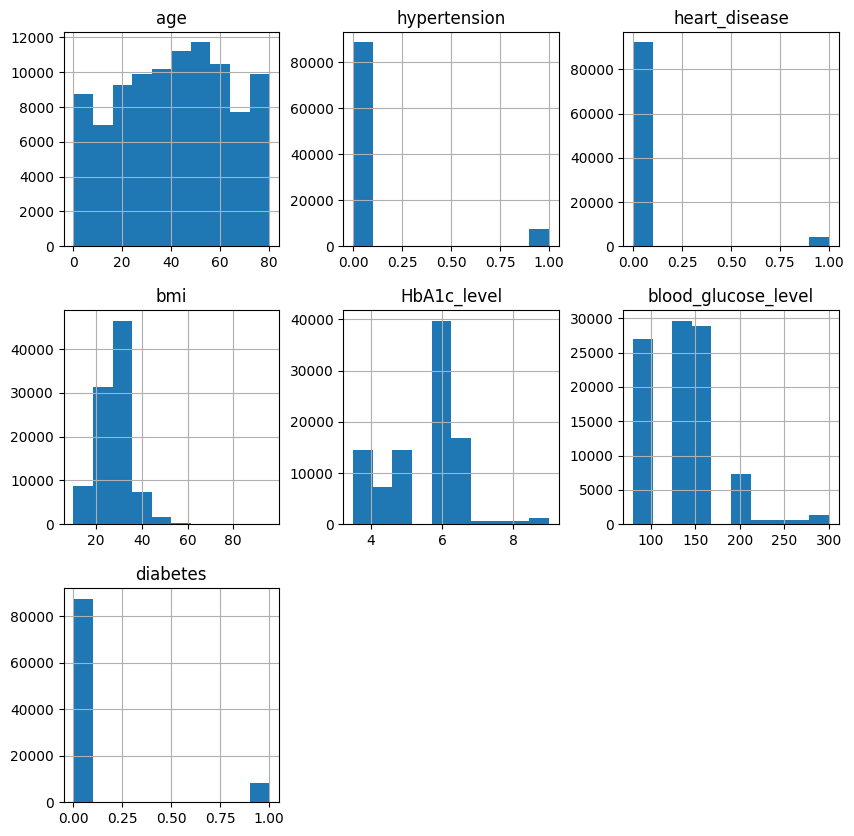

In [396]:
df.hist(figsize=(10, 10))

- Возраст: статистика собрана равномерно по всем возрастным группам, наибольшее кол-во людей в возрасте 40-50 лет, провалы(наименьшее) 10-15 и 70 лет.
- Индекс массы тела у большинства в районе 25-30(избыточный вес), далее - сильный спад(ИМТ > 30 - ожирение - имеют только 8000)
- В основном уровень глюкозы в крови около 140 - т.е норма (т.к. большая часть - здоровы)
- Уровень HbA1c распеделен неравномерно, значительная часть (выше 8000 человек) имеет гемоглобин A1c около 6 - т.е пред-/диабет(более 6,5% уровня HbA1c указывает на диабет.) и широкая выборка с гемоглобином от 2 до 5%

<Axes: >

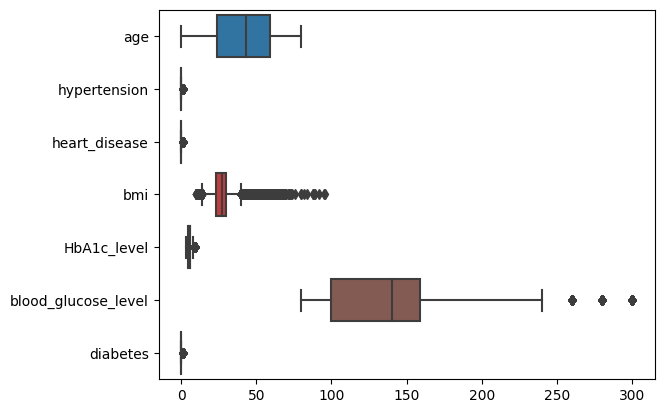

In [397]:
sns.boxplot(df, orient= 'h')

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


Text(0.5, 1.0, 'Глюкоза')

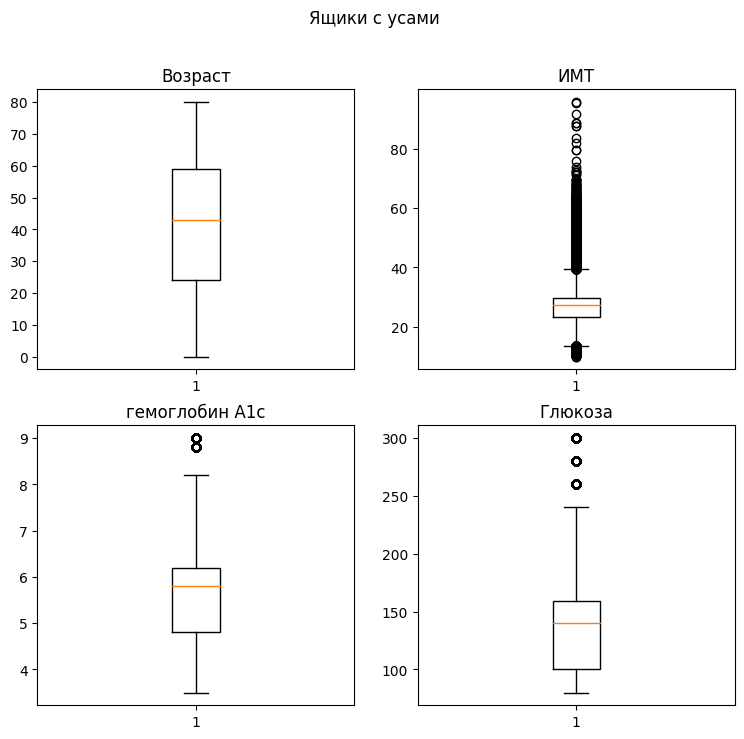

In [398]:
fig, ax = plt.subplots(2, 2, figsize=(9, 8))
fig.suptitle('Ящики с усами')
print(ax)

ax[0, 0].boxplot(df['age'])
ax[0, 0].set_title('Возраст')

ax[0, 1].boxplot(df['bmi'])
ax[0, 1].set_title('ИМТ')

ax[1, 0].boxplot(df['HbA1c_level'])
ax[1, 0].set_title('гемоглобин A1c')

ax[1, 1].boxplot(df['blood_glucose_level'])
ax[1, 1].set_title('Глюкоза')

Основная часть аномальных значений (выбросов) присутствует в столбцах bmi, blood_glucose_level, HbA1c_level

In [399]:
df.gender.value_counts() # Нашли новую рассу людей Other = 18
df = df[df.gender != 'Other']

In [400]:
df.smoking_history = df.smoking_history.str.replace("not current", "former") # not current - сейчас не курит, former - бывший курильщик -> значения равнозначны по смыслу

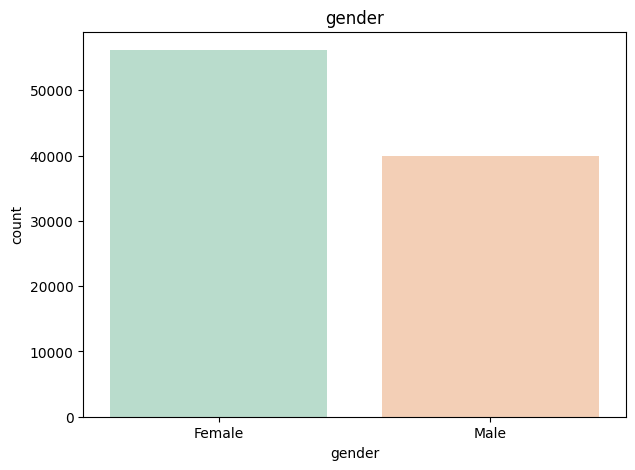

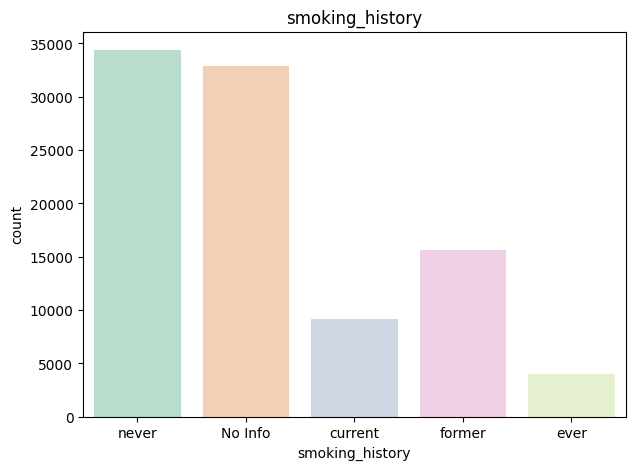

In [401]:
for col in df.select_dtypes(include='object'):
    plt.figure(figsize=(7, 5))
    plt.title(f'{col}')
    sns.countplot(data=df, x=col, palette = 'Pastel2')
plt.show()

В датасете:
- Больше женщин (50000), чем мужчин (40000)
- По статусу курилщика: большая часть не курит, либо нет информации (больше 33000 в каждом столбце), около 16000 бросили курить, сейчас курит около 10000 чел., всегда курило - 5000

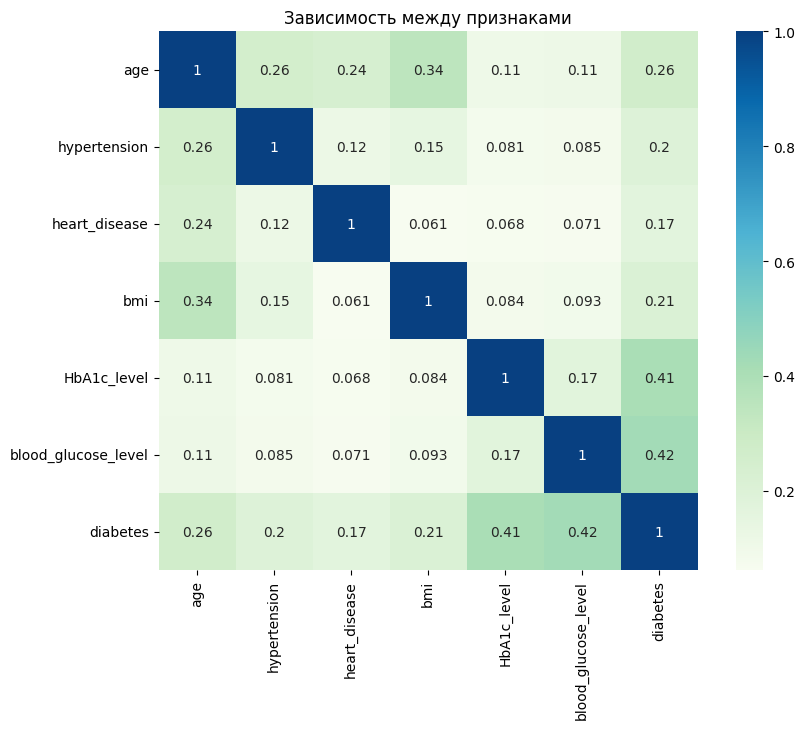

In [402]:
tmp = df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(10,7))
sns.heatmap(tmp, annot=True, cmap='GnBu')
plt.imshow(tmp)
plt.title('Зависимость между признаками')
plt.show()

**Вывод:** Корреляция показывает наибольшую зависимость таких признаков, как: диабет и уровень глюкозы в крови (=0.42), диабет и гемоглобин A1c (=0.41), ИТМ и возраст (=0.34). Высококорреляционных признаков не обнаружено.

## Сравнение выборок

После построения всех типов графиков, необходимо провести анализ:

Отобразите на одном графике две выборки — люди с диабетом и без и сравните их.

1. Для числовых признаков — гистограммы и ящики с усами.
2. Для категориальных — столбчатые диаграммы.

После напишите вывод, есть ли какая-то зависимость?

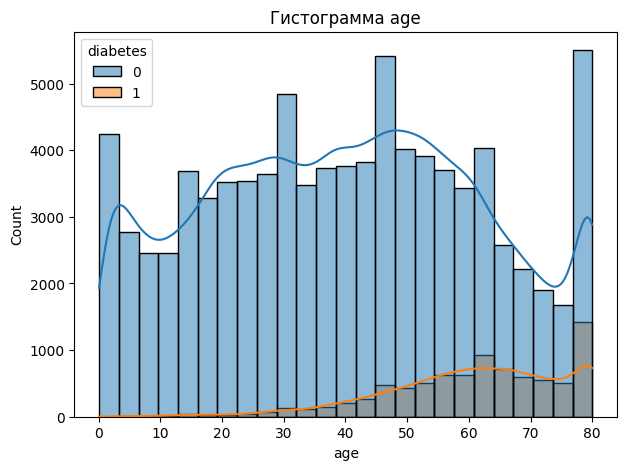

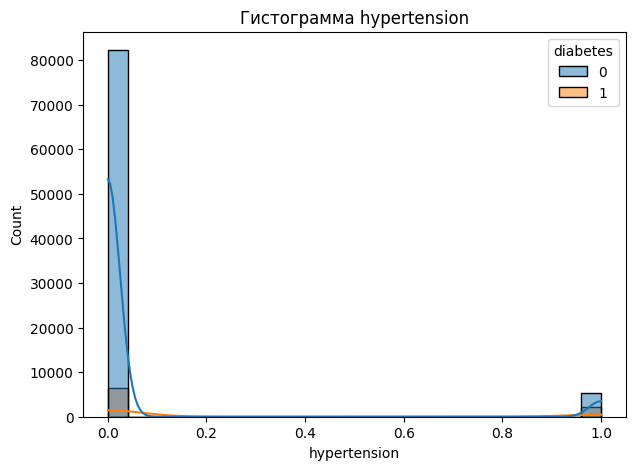

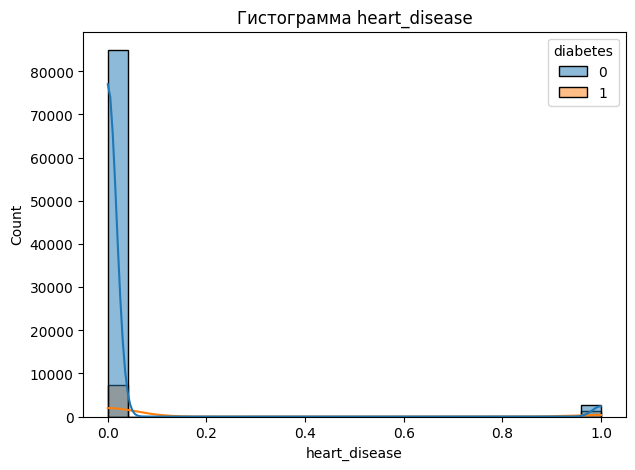

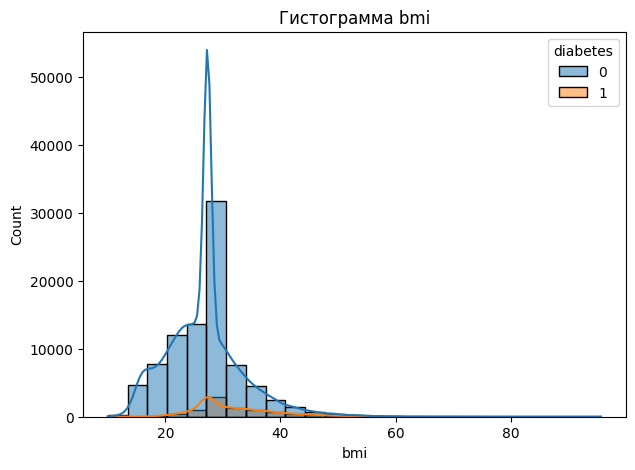

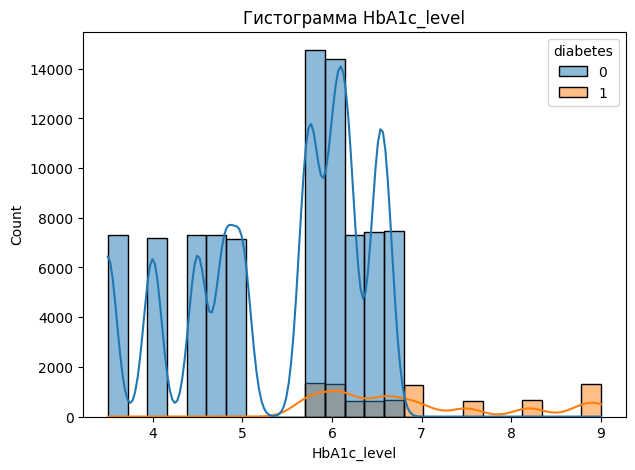

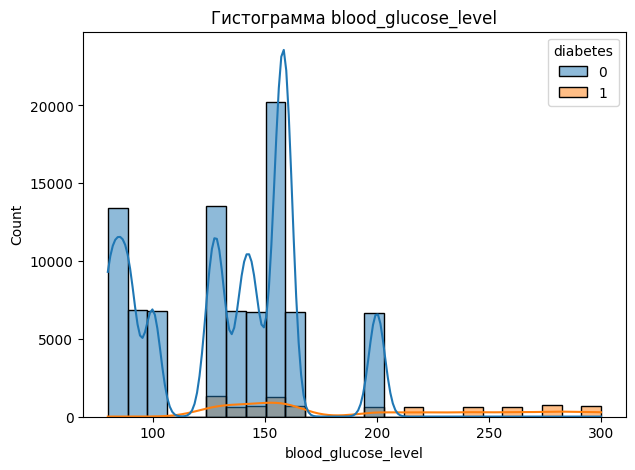

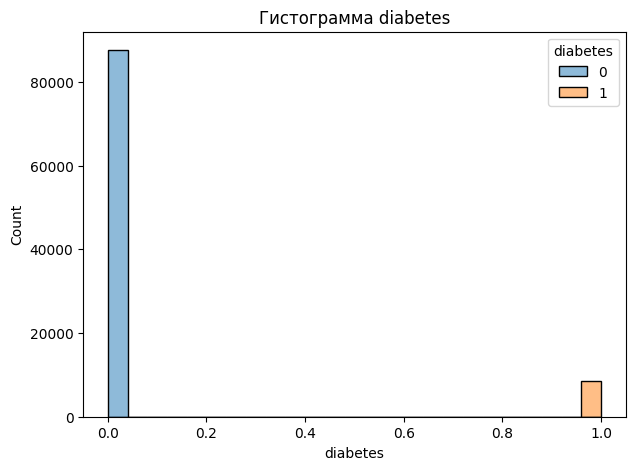

In [403]:
for col in df.select_dtypes(include='number'):
    plt.figure(figsize=(7, 5))
    plt.title(f'Гистограмма {col}')
    sns.histplot(x = col, hue = "diabetes", bins = 25, kde = True, data = df)

Плотность распределения людей, болеющих диабетом: возраст 50-70 лет (здоровые 30-60), ИТМ 28(что совпадает со здоровыми), ур. глюкозы 130-160 гемоглобин - наибольшая концентрация в районе 5.6-6.8% ,далее периодически поднимается и опускается вплоть до 9% (у здоровых 5.5-6.9%, выше 7% ни у кого нет).
Гипертония и болезни сердца у здоровых распр значительно выше

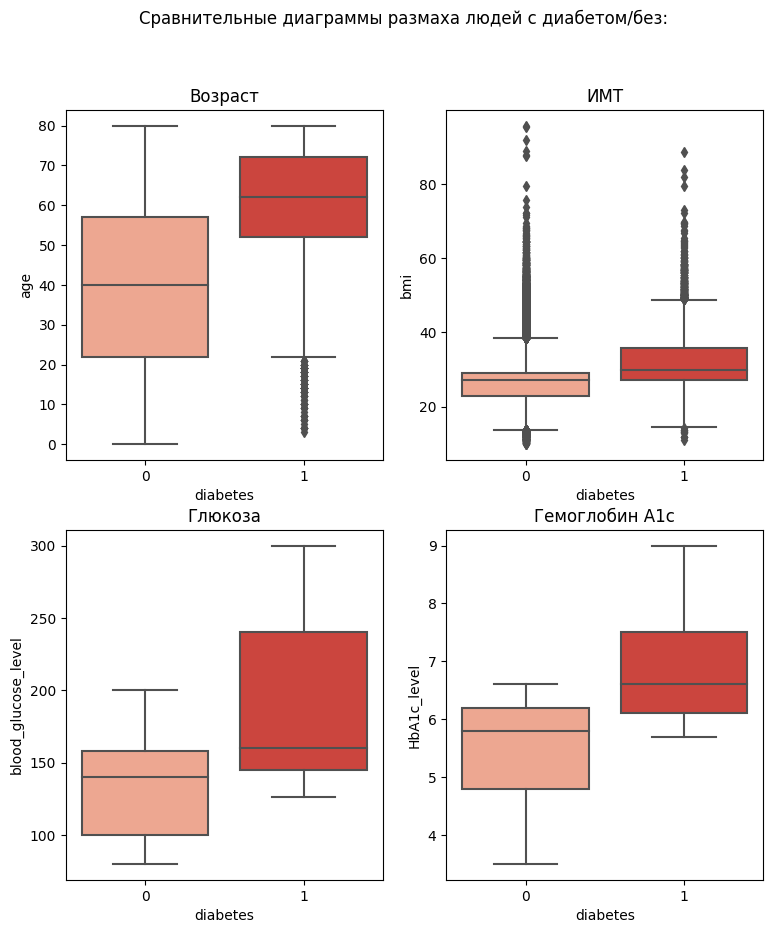

In [404]:
def plot_box(data, col, ax, name):
    sns.boxplot(data = data, x= 'diabetes', y =  col, ax= ax, palette = 'Reds')
    ax.set_title(name)
    plt.show

fig, axes = plt.subplots(2, 2,  figsize=(9, 10))
fig.suptitle('Сравнительные диаграммы размаха людей с диабетом/без:')
plot_box(df, 'age', axes[0,0], 'Возраст')
plot_box(df, 'bmi', axes[0,1], 'ИМТ')
plot_box(df, 'blood_glucose_level', axes[1,0], 'Глюкоза')
plot_box(df, 'HbA1c_level', axes[1,1], 'Гемоглобин А1с')

- Медиана возраста у здоровых людей = 40, больных = 60, при этом у вторых нижняя граница в районе 20 лет, а также наблюдаются выбросы(примерно от 3 до 23 лет).
- Индекс массы тела: медиана здоровых - 27, верхняя граница - 40, выбросы - на протяжении всего графика (максимальные значения выше, чем у диабетиков); медиана больных - 30, верхняя граница - 53
- Уровень глюкозы: медиана у здоровых = 140, max = 200, медиана больных = 160, max = 300, min = 130
- Гемоглобин А1с: медиана здоровых = 5.8%, max = 6.6, медиана больных = 6.6, max = 9, min = 5.7

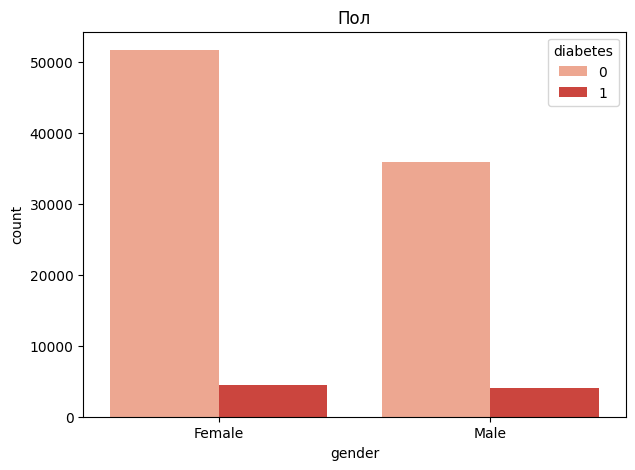

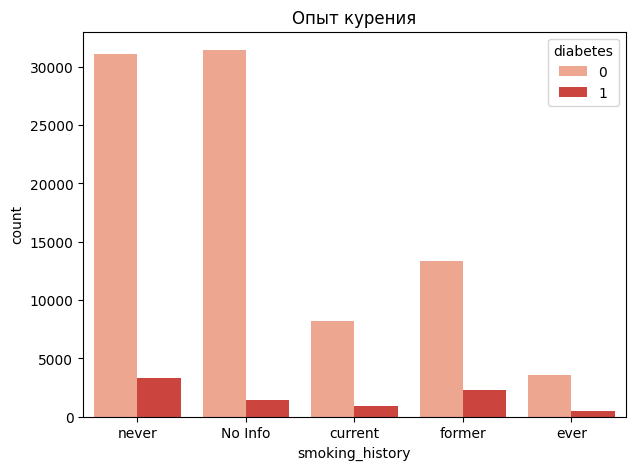

In [405]:
def plot_hist(data, col, figsize, name):
    plt.figure(figsize = figsize)
    plt.title(f'{name}')
    sns.countplot(data=data, x = col, hue = 'diabetes', palette = 'Reds')
    plt.show
plot_hist(df, 'gender', (7,5),'Пол')
plot_hist(df,'smoking_history', (7,5), 'Опыт курения')

In [406]:
len(df.loc[(df['gender'] == 'Male')])

39954

In [407]:
len(df.loc[(df['gender'] == 'Male') & (df['diabetes'] == 1)]) # диабет встреч у 10% мужчин

4035

In [408]:
len(df.loc[(df['gender'] == 'Female')])

56147

In [409]:
len(df.loc[(df['gender'] == 'Female') & (df['diabetes'] == 1)]) # диабет встреч у 7% женщин

4447

Распределение женщин и мужчин, болеющих диабетом, примерно одинаково. Диабетиков больше среди бросивших и никогда не куривших людей.

<Axes: xlabel='smoking_history', ylabel='count'>

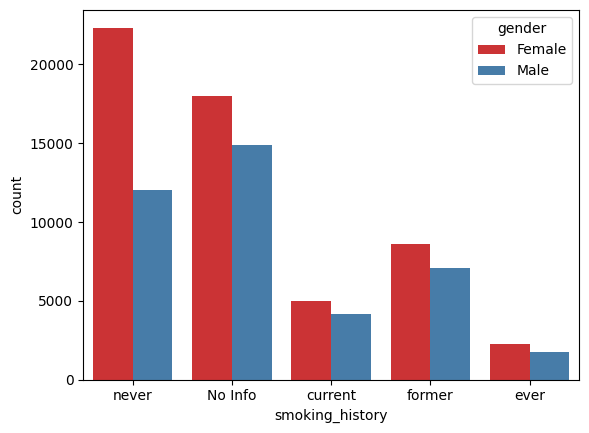

In [410]:
sns.countplot(data=df, x = 'smoking_history', hue = 'gender', palette = 'Set1') # т.к. мужчин с дибетом несколько выше, проверим опыт курения в зависимости от пола

Курящих в настоящий момент женщин больше, значит, взаимосвязи между полом и диабетом все-таки нет.

In [411]:
len(df.loc[(df['smoking_history'] == 'former')])

15658

In [412]:
len(df.loc[(df['smoking_history'] == 'former') & (df['diabetes'] == 1)]) # 14.5% диабетики от общего числа бросивших

2280

In [413]:
len(df.loc[(df['smoking_history'] == 'never')])

34395

In [414]:
len(df.loc[(df['smoking_history'] == 'never') & (df['diabetes'] == 1)]) # 9.7% диабетиков от общего числа никогда не куривших

3337

In [415]:
len(df.loc[(df['smoking_history'] == 'current')])

9170

In [416]:
len(df.loc[(df['smoking_history'] == 'current') & (df['diabetes'] == 1)]) # 10.3% диабетикок от общего числа курящих

948

In [417]:
len(df.loc[(df['smoking_history'] == 'ever')])

3997

In [418]:
len(df.loc[(df['smoking_history'] == 'ever') & (df['diabetes'] == 1)]) # 11.8% диабетики от общего числа всегда курящих

472

**Вывод:**
- Возникновение диабета не зависит от возраста и пола
- Статус курения не влияет на развитие диабета(однако бросивших, по сравнению с некурящими вообще, на 5% больше)

## ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но даёт ли этот результат полную картину? Наша цель — узнать, каков риск возникновения диабета у пациента.

Ваша задача — воспользоваться ранее приобретенными навыками и дополнить общий вывод. 

**Этапы:**

1) Разделите выборки и постройте дополнительные графики. Может стоит разделить на несколько выборок и сравнить графики там?
2) Постройте `pairplot` с параметром `hue=='diabetes'`. Может там тоже где-то кроется истина?
2) Постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
3) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить — может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

Мы провели базовый анализ выше и сделали выводы.

Но даёт ли этот результат полную картину? Наша цель — узнать, каков риск возникновения диабета у пациента.

Ваша задача — воспользоваться ранее приобретенными навыками и дополнить общий вывод. 

**Этапы:**

1) Разделите выборки и постройте дополнительные графики. Может стоит разделить на несколько выборок и сравнить графики там?
2) Постройте `pairplot` с параметром `hue=='diabetes'`. Может там тоже где-то кроется истина?
2) Постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
3) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить — может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

In [419]:
def weight_category(r):
    if r <= 18.5:
        return "Underweight"
    elif r >= 18.5 and r < 25:
        return "Normal"
    elif r >= 25 and r < 30:
        return "Overweight"
    else:
        return "Obesity"


In [420]:
df['weight_IMT'] = df['bmi'].apply(weight_category)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,weight_IMT
0,Female,80.0,0,1,never,25.19,6.6,140,0,Overweight
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Overweight
2,Male,28.0,0,0,never,27.32,5.7,158,0,Overweight
3,Female,36.0,0,0,current,23.45,5.0,155,0,Normal
4,Male,76.0,1,1,current,20.14,4.8,155,0,Normal
...,...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0,Normal
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0,Underweight
99997,Male,66.0,0,0,former,27.83,5.7,155,0,Overweight
99998,Female,24.0,0,0,never,35.42,4.0,100,0,Obesity


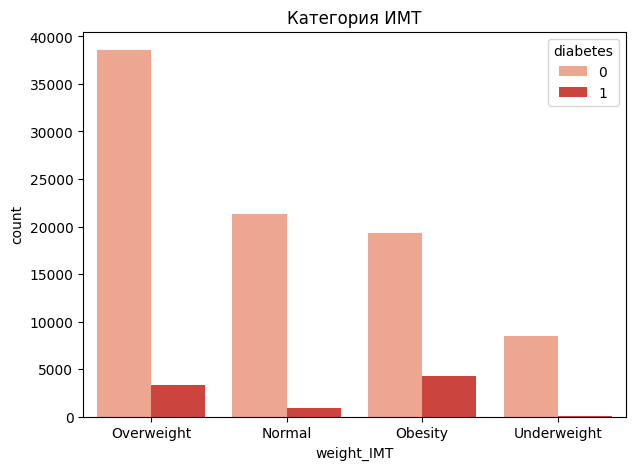

In [421]:
plot_hist(df, 'weight_IMT', (7,5),'Категория ИМТ')

In [422]:
def age_cat(row):
    if row < 14:
        return "children"
    elif row >= 14 and row < 18:
        return "teenager"
    elif row >= 18 and row < 35:
        return "adult"
    elif row >= 35 and row < 65:
        return "mature"
    else:
        return "ancient"

In [423]:
df['age_category'] = df['age'].apply(age_cat)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,weight_IMT,age_category
0,Female,80.0,0,1,never,25.19,6.6,140,0,Overweight,ancient
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Overweight,mature
2,Male,28.0,0,0,never,27.32,5.7,158,0,Overweight,adult
3,Female,36.0,0,0,current,23.45,5.0,155,0,Normal,mature
4,Male,76.0,1,1,current,20.14,4.8,155,0,Normal,ancient
...,...,...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0,Normal,mature
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0,Underweight,children
99997,Male,66.0,0,0,former,27.83,5.7,155,0,Overweight,ancient
99998,Female,24.0,0,0,never,35.42,4.0,100,0,Obesity,adult


<Axes: xlabel='age_category', ylabel='count'>

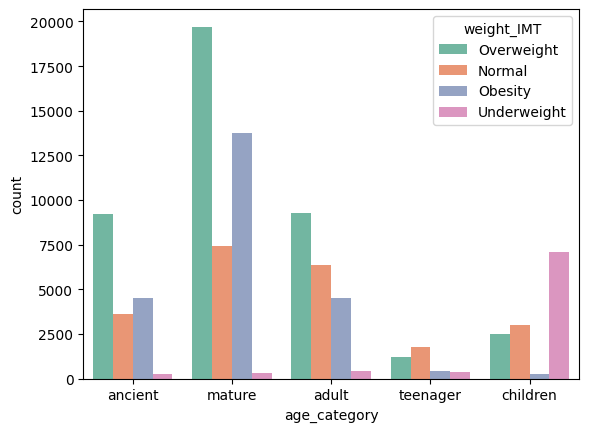

In [424]:
sns.countplot(data=df, x = 'age_category', hue = 'weight_IMT', palette = 'Set2') # сравнение возрастных и ИМТ категорий

<Axes: xlabel='smoking_history', ylabel='count'>

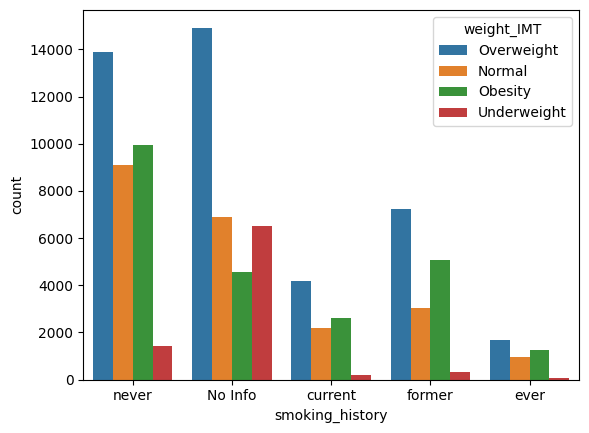

In [425]:
sns.countplot(data=df, x = 'smoking_history', hue = 'weight_IMT')

<Axes: xlabel='smoking_history', ylabel='count'>

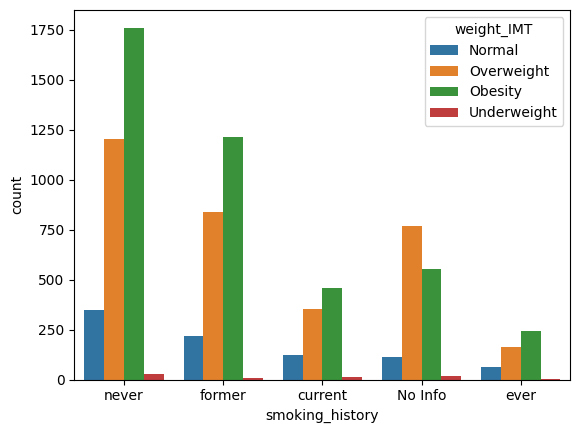

In [426]:
s_d = df.loc[df['diabetes'] == 1]
sns.countplot(data=s_d, x = 'smoking_history', hue = 'weight_IMT') # Опыт курения и категория массы тела диабетиков

Среди диабетиков основная масса никогда не курящих и бросивших, при этом подавляющая часть имеет ожирение и избыточный вес. Можно предположить влияние стрессовых факторов на формирование привычек курия и заедания стресса, из-за второго, в следствие постоянного повышенного уровня инсулина в крови, развивается невосприимчивость/нарушается работа поджелудочной железы, что и вызывает диабет

<Axes: xlabel='smoking_history', ylabel='count'>

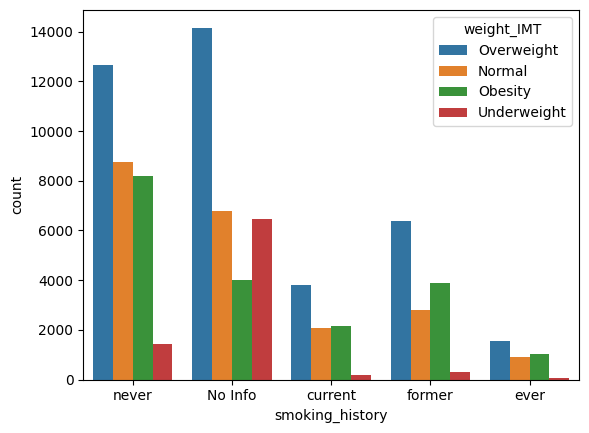

In [427]:
s_d = df.loc[df['diabetes'] == 0]
sns.countplot(data=s_d, x = 'smoking_history', hue = 'weight_IMT') # Опыт курения и категория массы тела здоровых людей

У здоровых людей наблюдается больше избыточный и нормальный вес

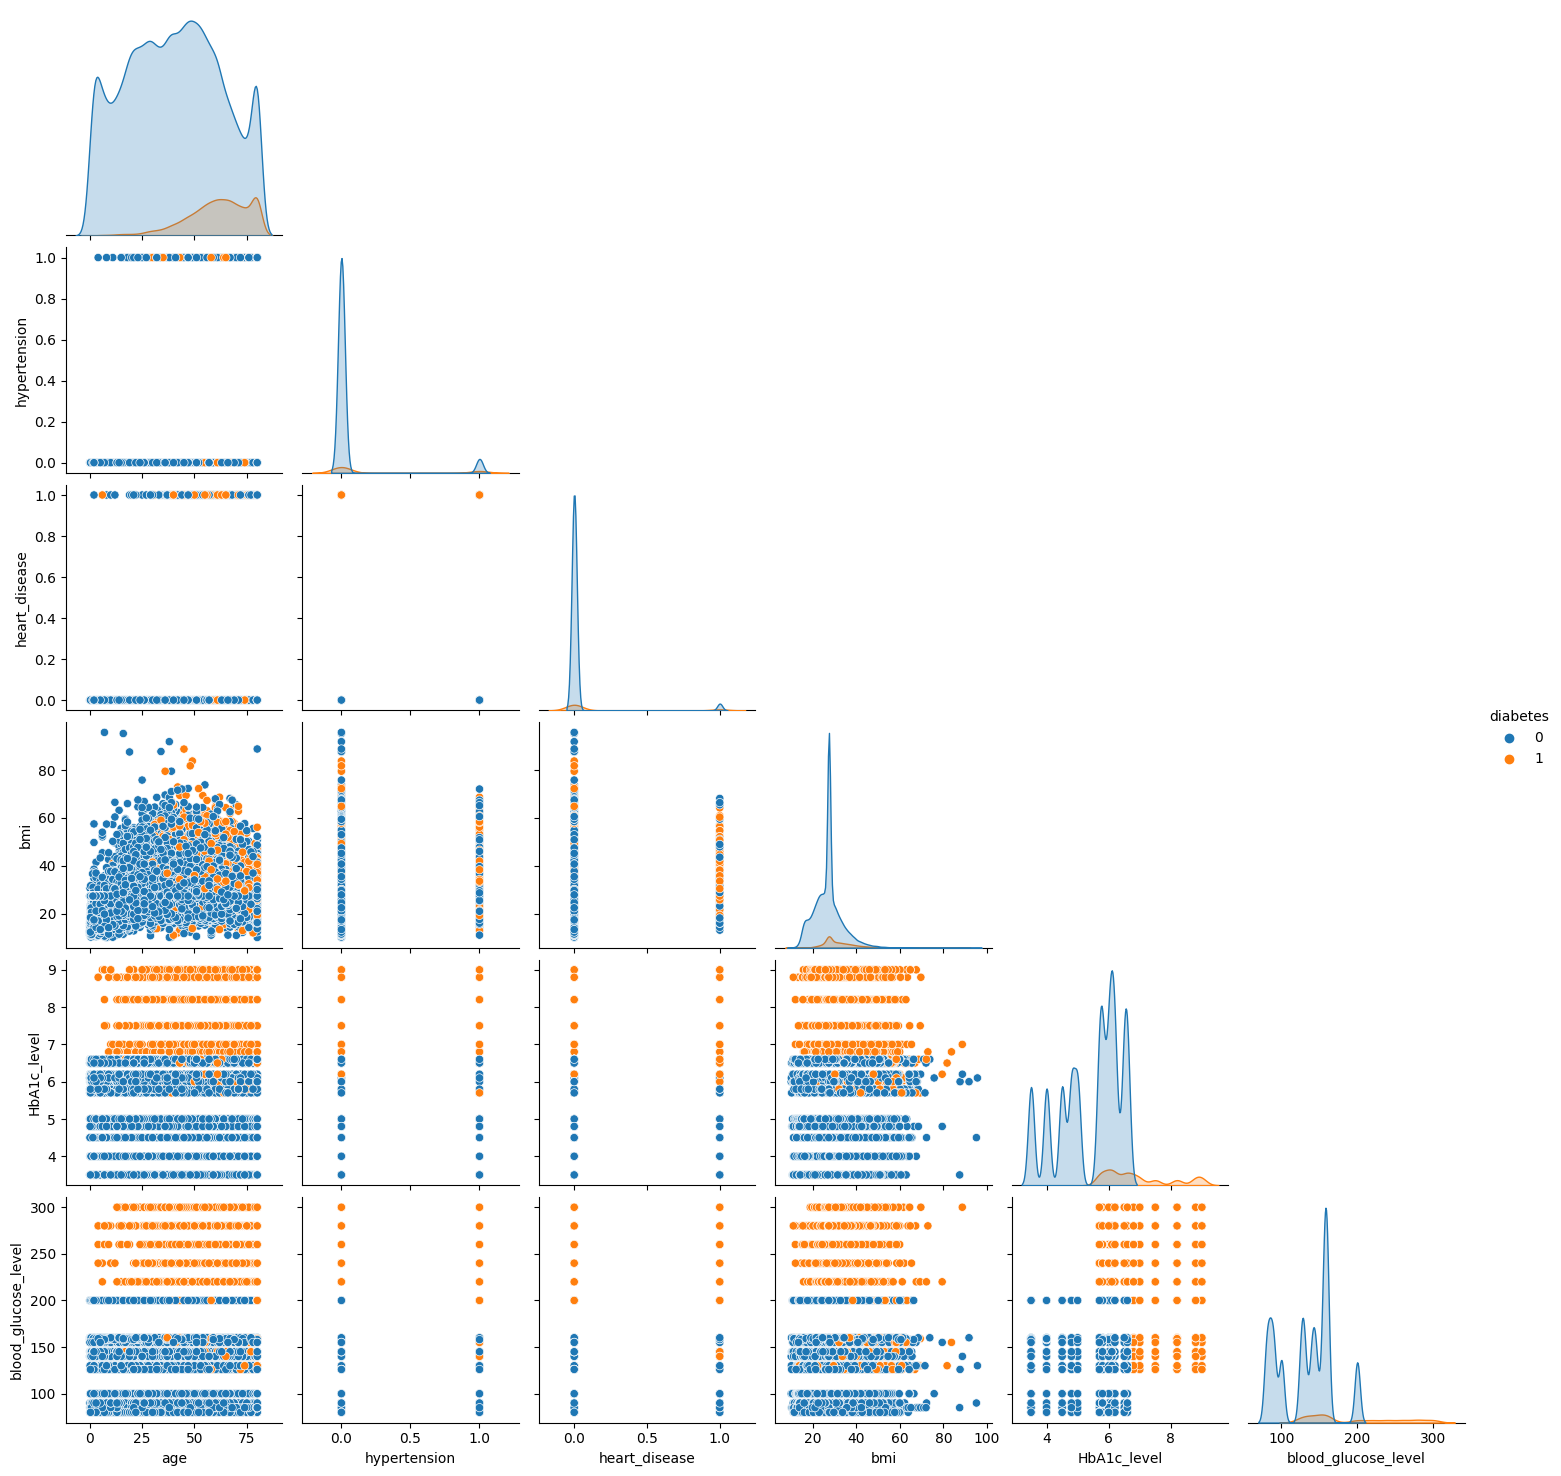

In [428]:
sns.pairplot(df, corner=True, hue='diabetes')

In [429]:
!pip install phik -q

In [430]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

interval columns not set, guessing: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


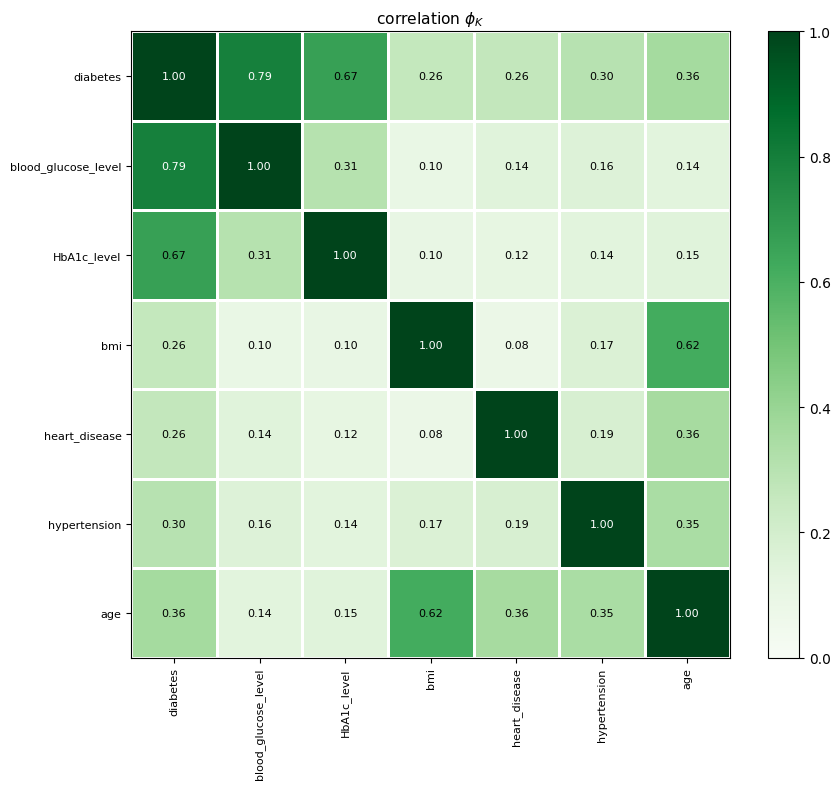

In [431]:
df_phink = df.select_dtypes(exclude='object')
phik_overview = df_phink.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.8, figsize=(9, 8))
plt.tight_layout()

# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах:
- Все люди, у которых уровень глюкозы выше 200 и гемоглобин A1c от 6.8%, болеют диабетом. Высокий (в том числе на протяжении длительного времени) уровень сахара в крови повышает риск возникновения заболевания.
- Курение никак не влияет на появление заболевания
- Распределение женщин и мужчин, болеющих диабетом, примерно одинаково.
- Сильной корреляционной зависимости диабета от ИМТ нет, однако, значительная доля болеющих приходится на людей, имеющих ожирение и избыточный вес. Также нет корреляции между заболеваниями сердца, гипертонией.
- У большинства диабет развивается в районе 60 лет (50-70). При этом у зрелых и пожилых людей доля нормального ИМТ меньше, т.е большая часть имеет избыточный вес или ожирение. Он может возникнуть в любом возрасте, как в следствие от нарушения работы (заболевания) внутренних органов, так и образа жизни(*предположительно, см. Pro гистограммы smoking_history).